# **PREDICTING TRAVEL INSURANCE PURCHASE USING MACHINE LEARNING**


---


### **BUSINESS UNDERSTANDING**


---


---


### **PROBLEM STATEMENT**


ExploreXperience a tour company, has been offering travel insurance to its customers and especially during the Covid-19 pandemic.The Company is seeking to understand which customers would be interested to buy the travel insurance post the pandemic period. Past data on the performance of the sales of the travel insurance package will be used for analysis.

> The significance of utilizing data for this endeavor cannot be overstated. Data-driven insights play an instrumental role in comprehending customer behavior, preferences, and trends. By dissecting past sales records, ExploreXperience gains valuable intelligence on customer demographics, buying patterns, and the efficacy of their previous insurance offerings. This data empowers them to identify key indicators that signify a customer's inclination towards purchasing travel insurance.

The implications of this analysis are profound for ExploreXperience. It allows them to make informed, targeted marketing efforts, optimizing their resources and increasing the likelihood of a successful campaign. By accurately identifying potential customers, they not only enhance their revenue stream but also solidify customer trust and loyalty. This strategic use of data ensures that ExploreXperience remains agile and responsive to changing market dynamics, ultimately securing its position as a forward-thinking industry leader.

**Main objective:** The main objective of this project is to come up with a predictive model that will be able to identify customers who are more likely to buy the travel insurance package so as it send them targeted marketing messages


### **Other objectives**

The project will also involve an exploratory data analysis to come up with insights and recommendations on what factors determine to a large extend whether a customer will buy or not buy the travel insurance package


### **Metric for success**

The project will be considered successful if the model has an accuracy of 90% and has recall of above 80% and is succesfully deployed into a production enviroment.


## **DATA UNDERSTANDING**


---


---


This dataset has 1987 rows and 10 columns. The columns include:


### Data Description

Here is the description of variables in the dataset:

| Variable Name       | Description                                                                                                                       |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| Unnamed             | The id of the data entry                                                                                                          |
| Age                 | Age of the customer                                                                                                               |
| Employment Type     | The sector in which customer is employed                                                                                          |
| GraduateOrNot       | Whether the customer is a college graduate or not                                                                                 |
| AnnualIncome        | Yearly income of the customer in Indian Rupees (rounded to nearest 50 thousand Rupees)                                            |
| FamilyMembers       | Number of members in customer's family                                                                                            |
| ChronicDisease      | Whether the customer suffers from any major disease or conditions like diabetes, high blood pressure, or asthma                   |
| FrequentFlyer       | Derived data based on customer's history of booking air tickets on at least 4 different instances in the last 2 years (2017-2019) |
| EverTravelledAbroad | Has the customer ever traveled to a foreign country (not necessarily using the company's services)                                |
| TravelInsurance     | Did the customer buy travel insurance package during introductory offering held in the year 2019                                  |


#### Reading in the dataset


In [1]:
# importing all the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in data from a csv file 

df = pd.read_csv("data/traveldata.csv")

In [3]:
# checking the first few rows of the dataframe 

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
# checking the last few rows of the dataset

df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


Data cleaning
In this section, we will focus on the following tasks:

- Identifying and handling missing values
- Identifying and addressing duplicated values
- Verifying if the dataset has the expected data types for each column
- Identifying and removing redundant columns.


1. `Checking and dealing with missing values in the dataset`


In [5]:
# checking if the dataset has missing values by writing a function

def missing_values_percent(df):
  df_nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Missing values count'])
  df_nulls['% of missing values'] = df.isnull().sum().sort_values(ascending=False)/len(df) 
  return df_nulls

In [6]:
missing_values_percent(df)

,Missing values count,% of missing values
Unnamed: 0,0,0.0
Age,0,0.0
Employment Type,0,0.0
GraduateOrNot,0,0.0
AnnualIncome,0,0.0
FamilyMembers,0,0.0
ChronicDiseases,0,0.0
FrequentFlyer,0,0.0
EverTravelledAbroad,0,0.0
TravelInsurance,0,0.0


There are no `missing values `for any of the columns for the dataset


2. `Checking and dealing with duplicated values in the dataset`


In [7]:
# checking for any duplicated values in the dataset 

df.duplicated().sum()

0

There are `no duplicated valeus in the dataset`


3. `Checking if dataset has the expected data types`


In [8]:
# checking if the dataset has the expected data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


The data types of the various columns of the dataset seem to be as expected except for Chronic diseases and Travel insurance which need to factors


In [9]:
# columns to convert to factors

fct_columns = ['ChronicDiseases','TravelInsurance']

In [10]:
# converting fct columns to object type rather than in interger

df[fct_columns] = df[fct_columns].astype(str)

4. `Checking and dealing with redudant columns in the dataset`


In [11]:
# checking columns and removing any redudant column from the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   object
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   object
dtypes: int64(4), object(6)
memory usage: 155.4+ KB


From the llok of things, it seems that the Column Unnamed:0 only acts as an index for the records in the dataset and does not provide any meaniful information.


In [12]:
# dropping redudant column 

df = df.drop('Unnamed: 0', axis=1)

In [13]:
# checking the first few rows of the new dataset without redudant column

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### **EXPLORATORY DATA ANALYSIS**


---


---


#### **UNIVARIATE ANALYSIS**


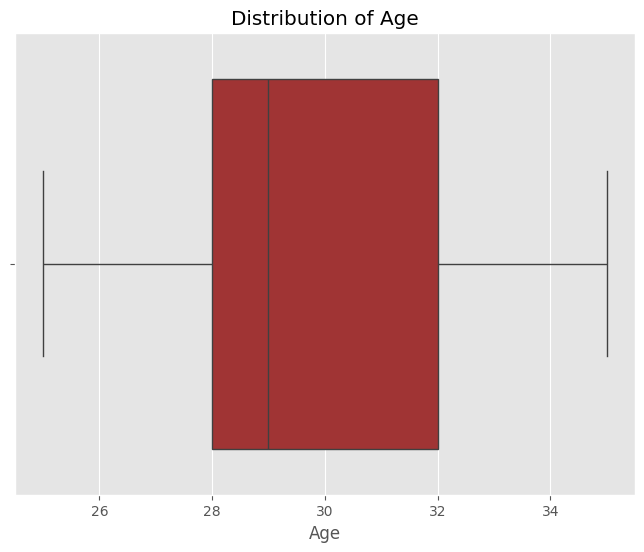

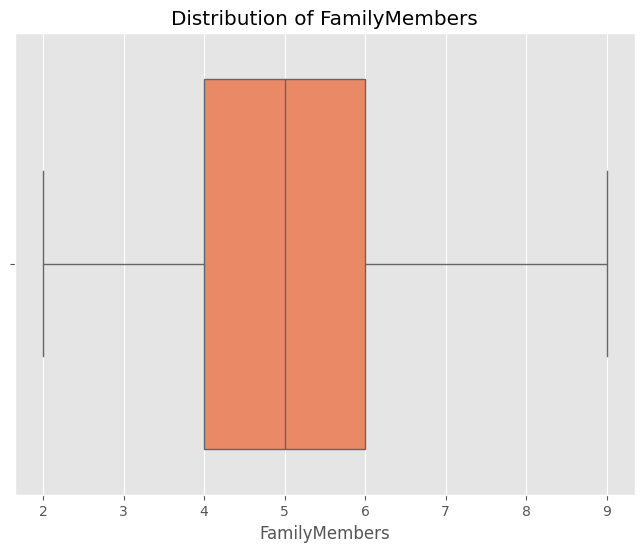

In [14]:
class DistributionChecker:
    def __init__(self, df):
        self.df = df

    def plot_distribution(self, column, color):
        plt.figure(figsize=(8,6))
        sns.boxplot(x=column, color=color, data=self.df)
        plt.title(f"Distribution of {column}")
        plt.show()


# Create an instance of DistributionChecker
checker = DistributionChecker(df)

# Plot distribution of age
checker.plot_distribution("Age", "firebrick")

# Plot distribution of family members
checker.plot_distribution("FamilyMembers", "coral")

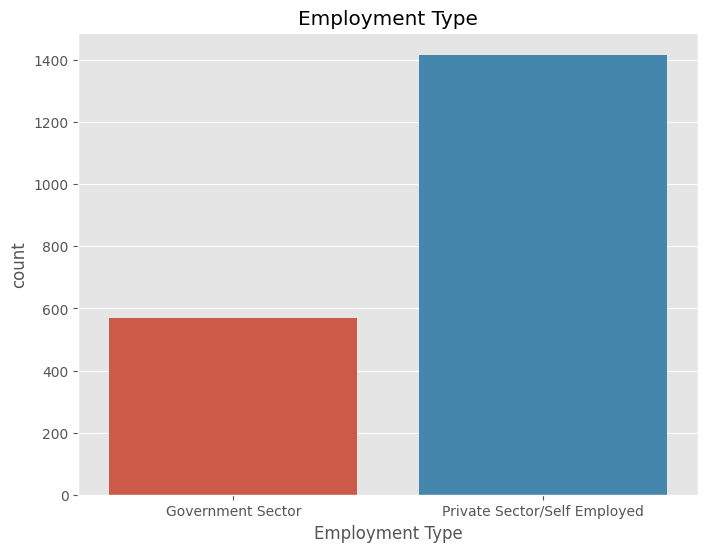

In [17]:
# Employment type

plt.figure(figsize=(8, 6))
sns.countplot(x="Employment Type", data=df, hue="Employment Type")
plt.title('Employment Type')
plt.show()

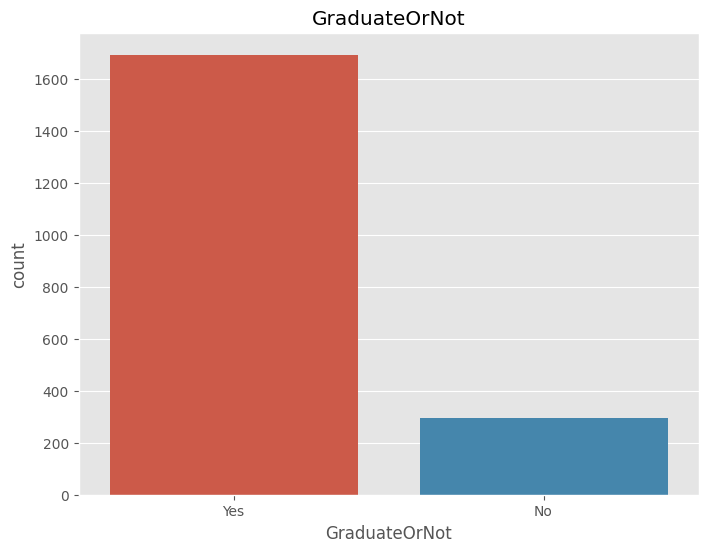

In [18]:
# GraduateOrNot

plt.figure(figsize=(8, 6))
sns.countplot(x="GraduateOrNot", data=df, hue="GraduateOrNot")
plt.title('GraduateOrNot')
plt.show()

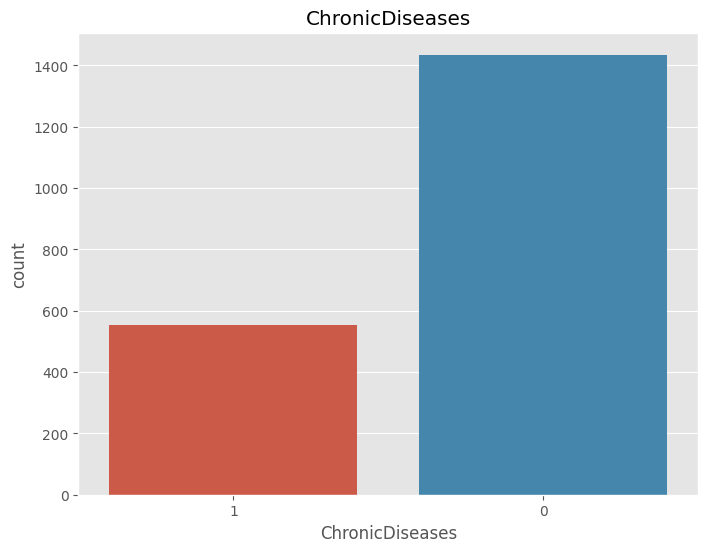

In [19]:
# ChronicDiseases

plt.figure(figsize=(8, 6))
sns.countplot(x="ChronicDiseases", data=df, hue="ChronicDiseases")
plt.title('ChronicDiseases')
plt.show()


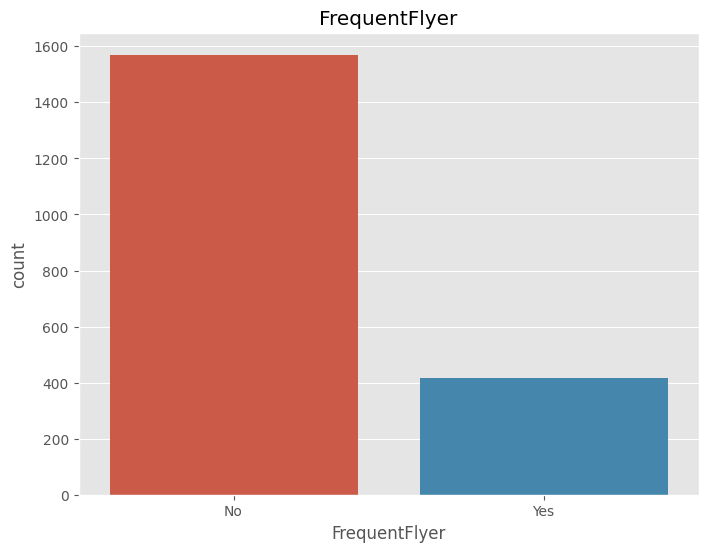

In [20]:
# FrequentFlyer

plt.figure(figsize=(8, 6))
sns.countplot(x="FrequentFlyer", data=df, hue="FrequentFlyer")
plt.title('FrequentFlyer')
plt.show()

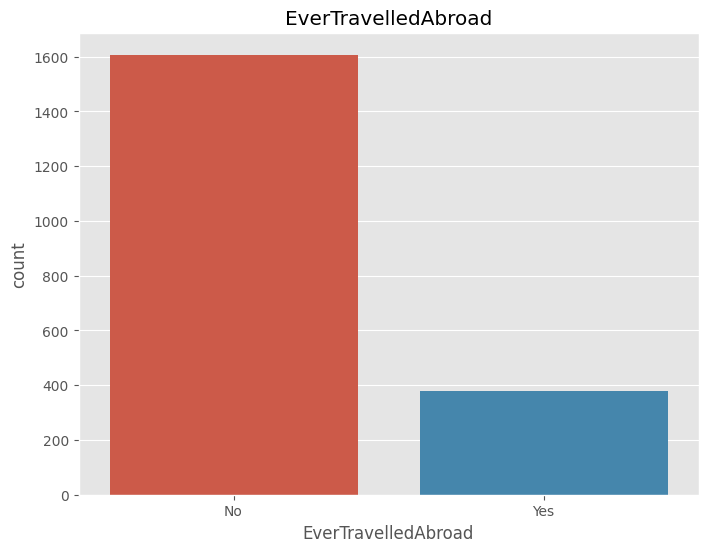

In [21]:
# EverTravelledAbroad

plt.figure(figsize=(8, 6))
sns.countplot(x="EverTravelledAbroad", data=df, hue="EverTravelledAbroad")
plt.title('EverTravelledAbroad')
plt.show()

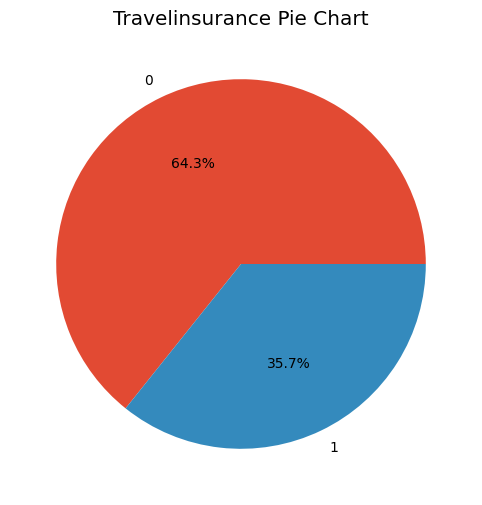

In [22]:
# travel insurance 

travelinsurance_counts = df['TravelInsurance'].value_counts().reset_index()
travelinsurance_counts.columns = ['Category', 'Count']

#  pie chart 
plt.figure(figsize=(8, 6))
plt.pie(travelinsurance_counts['Count'], labels=travelinsurance_counts['Category'], autopct='%1.1f%%')
plt.title('Travelinsurance Pie Chart')
plt.show()

In [23]:
# dataframe summary 

df.describe(include="all")

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987,1987,1987,1987
unique,NaN,2,2,NaN,NaN,2,2,2,2
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,0,No,No,0
freq,NaN,1417,1692,NaN,NaN,1435,1570,1607,1277
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,NaN,NaN,NaN,NaN
std,2.913308,NaN,NaN,3.768557e+05,1.609650,NaN,NaN,NaN,NaN
min,25.000000,NaN,NaN,3.000000e+05,2.000000,NaN,NaN,NaN,NaN
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,NaN,NaN,NaN,NaN
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,NaN,NaN,NaN,NaN
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,NaN,NaN,NaN,NaN


- The age of these individuals ranges from 25 to 35 years, with an average age of approximately 29.65 years and a standard deviation of about 2.91.

- In terms of employment, the majority (1417 out of 1987) are in the private sector or self-employed. Regarding education, most individuals (1692 out of 1987) are graduates.

- The annual income of these individuals varies widely, with the lowest being 300,000 and the highest being 1,800,000 . The average annual income is approximately 932,763 , with a standard deviation of about 376,856 .

- Family sizes range from 2 to 9 members, with an average of approximately 4.75 members per family and a standard deviation of about 1.61.

- Concerning health, 1435 individuals report having no chronic diseases, while the remaining 552 individuals indicate the presence of at least one chronic condition.

- When it comes to travel behavior, the majority (1607 out of 1987) have not traveled abroad. Additionally, most individuals (1570 out of 1987) do not have a history of frequent air travel.

- Lastly, in terms of travel insurance, a considerable portion (1277 out of 1987) 64.3% did not purchase a travel insurance package during the introductory offering held in the year 2019 with only 35.7% buying the travel insurance.


### **BIVARIATE ANALYSIS**


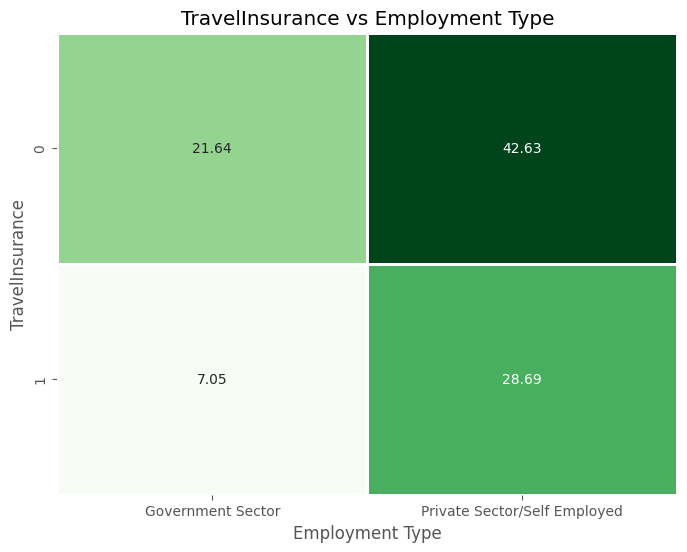

In [30]:
# travelinsurance vs employment type 


plt.figure(figsize=(8,6))
counts = df.groupby(['TravelInsurance', 'Employment Type']).size().reset_index(name='counts')
pivot = counts.pivot(index="TravelInsurance", columns="Employment Type", values="counts")
# Calculate percentages
total_counts = counts['counts'].sum()
pivot_percentages = (pivot / total_counts) * 100

sns.heatmap(pivot_percentages, annot=True, cmap="Greens", linewidths=2, fmt=".2f", cbar=False)
plt.title("TravelInsurance vs Employment Type")
plt.show()

From the heatmap, it is clear that most people who bought the travelInsurance where from the private sector(28%) with only 7% of the total being from government sector. However, there was around 42.63% of the costumers from the private sector who did not buy the insurance and 21.64% from the public sector.


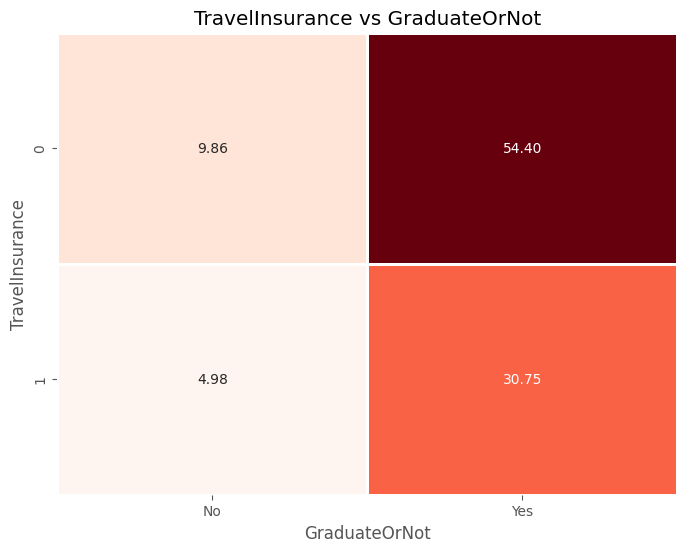

In [32]:
# travelinsuarance vs GraduateOrNot


plt.figure(figsize=(8,6))
counts = df.groupby(['TravelInsurance', 'GraduateOrNot']).size().reset_index(name='counts')
pivot = counts.pivot(index="TravelInsurance", columns="GraduateOrNot", values="counts")

# Calculate percentages
total_counts = counts['counts'].sum()
pivot_percentages = (pivot / total_counts) * 100

sns.heatmap(pivot_percentages, annot=True, cmap="Reds", linewidths=2, fmt=".2f", cbar=False)
plt.title("TravelInsurance vs GraduateOrNot")
plt.show()

Accodring to the heatmap, 30.75% of the customers bought insurance and were graduates compared to 4.98 who were not graduates. However, there were about 54.40% of customers who were indeed graduates but did not buy the insurance.


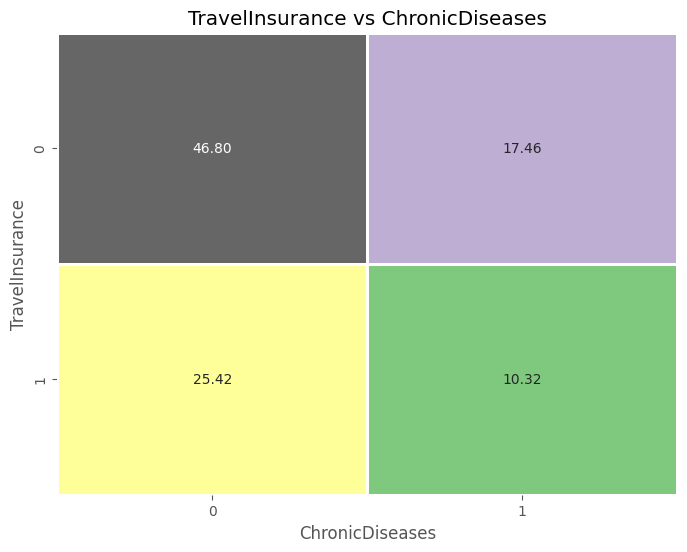

In [33]:
# travelinsuarance vs ChronicDiseases


plt.figure(figsize=(8,6))
counts = df.groupby(['TravelInsurance', 'ChronicDiseases']).size().reset_index(name='counts')
pivot = counts.pivot(index="TravelInsurance", columns="ChronicDiseases", values="counts")

# Calculate percentages
total_counts = counts['counts'].sum()
pivot_percentages = (pivot / total_counts) * 100

sns.heatmap(pivot_percentages, annot=True, cmap="Accent", linewidths=2, fmt=".2f", cbar=False)
plt.title("TravelInsurance vs ChronicDiseases")
plt.show()

Only 10% of the customers had chronic diseases and also purchased travelinsurance compared to 25% who did not have chronic diseases. It was also clear that around 46% of the customers did not have chronic and did not purchase travel insurance.


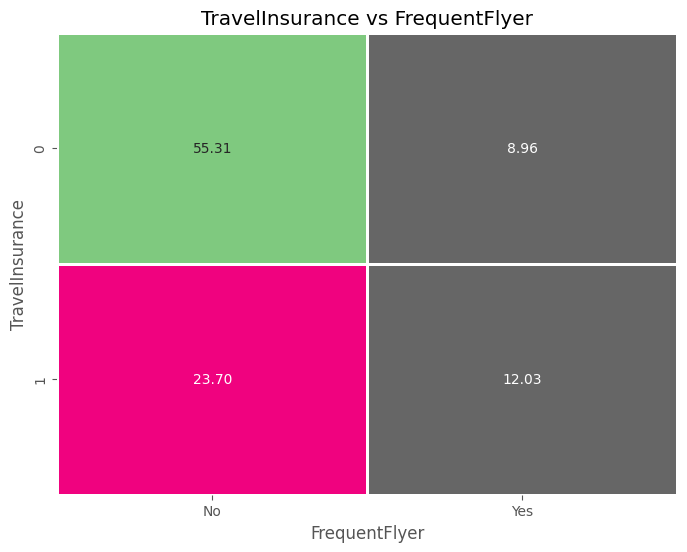

In [34]:
# travelinsuarance vs FrequentFlyer


plt.figure(figsize=(8,6))
counts = df.groupby(['TravelInsurance', 'FrequentFlyer']).size().reset_index(name='counts')
pivot = counts.pivot(index="TravelInsurance", columns="FrequentFlyer",values= "counts")

# Calculate percentages
total_counts = counts['counts'].sum()
pivot_percentages = (pivot / total_counts) * 100

sns.heatmap(pivot_percentages, annot=True, cmap="Accent_r", linewidths=2, fmt=".2f", cbar=False)
plt.title("TravelInsurance vs FrequentFlyer")
plt.show()

Only 12% of the customers were frequant flyers and also bought travel insurance with 23.70% of them been not frequent flyers. Additionally, around 55% of the customers did not buy the insurance and were also not frequent flyers.


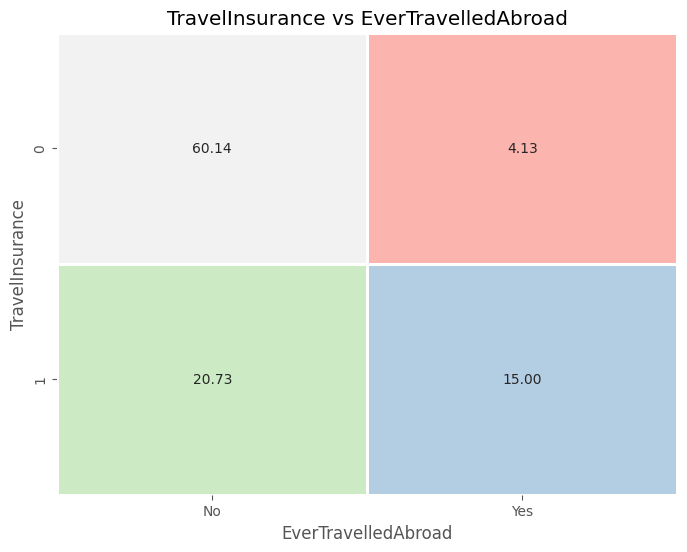

In [35]:
# travelinsuarance vs EverTravelledAbroad


plt.figure(figsize=(8,6))
counts = df.groupby(['TravelInsurance', 'EverTravelledAbroad']).size().reset_index(name='counts')
pivot = counts.pivot(index="TravelInsurance", columns="EverTravelledAbroad", values="counts")

# Calculate percentages
total_counts = counts['counts'].sum()
pivot_percentages = (pivot / total_counts) * 100

sns.heatmap(pivot_percentages, annot=True, cmap="Pastel1", linewidths=2, fmt=".2f", cbar=False)
plt.title("TravelInsurance vs EverTravelledAbroad")
plt.show()

Only 15% of the customers had travelled abroad and purchased the insurance package. On the other hand, 20.73% of the customers had not travelled abroad yet they had purchased the package. Approximately 60% of the customers had not travelled abroad and also not purchased the travel insurance package.


#### **MULTIVARIATE ANALYSIS**


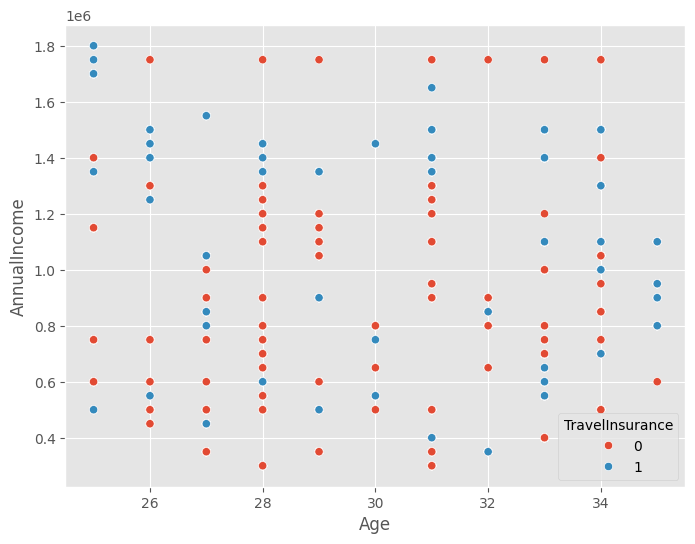

In [36]:
# Age vs Annual income for travelinsurance

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="AnnualIncome", hue="TravelInsurance", data=df)
plt.show()

It seemed as thought there is no apparent relationship between age, annual income and purchase of annual travel insurance.


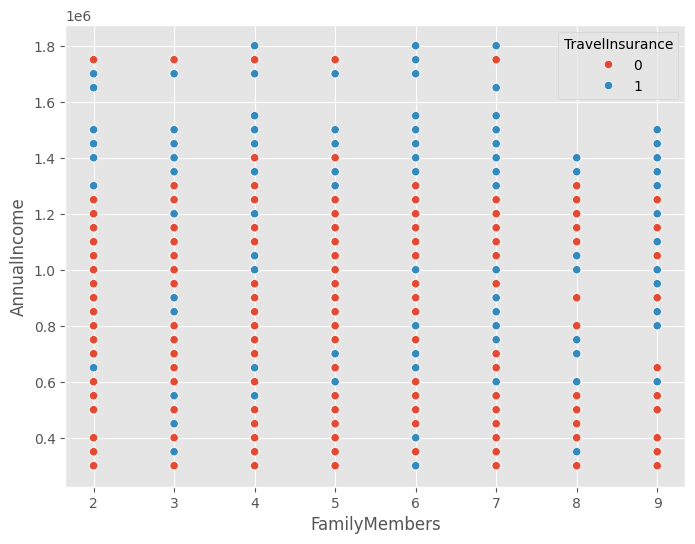

In [37]:
# Annual income vs familymembers for travelinsurance

plt.figure(figsize=(8,6))
sns.scatterplot(x="FamilyMembers", y="AnnualIncome", hue="TravelInsurance", data=df)
plt.show()

## **RECOMMENDATIONS**


- Target the Private Sector: Since a significant portion of customers who purchased travel insurance were from the private sector (28%), ExploreXperience should focus their marketing efforts on this demographic. However, it's also important to note that a substantial number of private sector customers (42.63%) did not buy insurance. Therefore, tailored marketing strategies should be employed to address the concerns or preferences of this group.

- Leverage Education Level: Customers who were graduates were more likely to purchase travel insurance (30.75%) compared to those who were not graduates (4.98%). This indicates that education level may be a significant factor in a customer's decision to buy insurance. ExploreXperience can create targeted campaigns or incentives to attract and convert more non-graduate customers.

- Consider Chronic Disease Status: ExploreXperience should pay attention to customers with chronic diseases. Currently, only 10% of customers with chronic diseases purchased travel insurance. This represents an opportunity to provide tailored insurance offerings or additional benefits for this group. Additionally, efforts can be made to address concerns or reservations that may be preventing them from purchasing insurance.

- Engage Frequent Flyers: Given that only 12% of customers identified as frequent flyers purchased travel insurance, ExploreXperience can create promotions or packages specifically designed to cater to this group. Highlighting the benefits of insurance for frequent travelers and providing attractive offers can increase conversion rates.

- Promote Travel Abroad Experiences: Customers who have traveled abroad in the past are more likely to purchase travel insurance (15%). ExploreXperience can capitalize on this by emphasizing the value of insurance for international travel. This could include features like medical coverage, trip cancellation protection, and assistance services tailored for overseas trips.

- Educate Non-Travelers on Insurance Benefits: There is a large segment of customers (60%) who have not traveled abroad and have not purchased travel insurance. ExploreXperience can run awareness campaigns highlighting the importance of insurance, even for domestic trips. This can include coverage for unexpected events like trip cancellations, medical emergencies, or lost luggage.

- Customer Feedback and Customization: Gathering feedback from customers who did not purchase insurance can provide valuable insights into their concerns or reasons for not opting for it. This information can be used to customize insurance offerings, address objections, and improve the overall value proposition.
